# Introduction

In this notebook, I will be recreating the majority of a kernel, [located here](https://www.kaggle.com/benhamner/python-data-visualizations) in order to further my understanding of the [Iris species data set](https://www.kaggle.com/uciml/iris/). This is for a project for DATA 550 at Mercyhurst University, which is part of the Masters of Data Science graduate program.

## Libraries

For this notebook, we will be utilizing several Python libraries:
1. Pandas
2. Seaborn
3. Matplotlib

## Data Files

Included in the GitHub repository are two data files, downloaded from [Kaggle](http://www.kaggle.com/). These files are located in the input folder, so as to match the storage structure that is on Kaggle.


## Data Overview

First off, we want to import the libraries that we will be using.  Additionally, we can give them aliases, so that there will be less typing required each time we reference the library.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Next up, we want to read the CSV file of data.  Using the ```head()``` method to get a quick view of the structure of the data.  

Here we can see there are 6 different columns of data:
1. Id
2. SepalLengthCm
3. SepalWidthCm
4. PetalLengthCm
5. PetalWidthCm
6. Species

In [3]:
iris = pd.read_csv('../input/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


From this quick view, we can see that the data contains length and width data for petals and sepals for different species.  We can get a quick idea of how much data for each species there is by using the ```value_counts()``` method from pandas.

In [4]:
species_count = pd.value_counts(iris["Species"])
species_count

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## Visualizations

Our purpose of this data is to start analyzing it and providing visualizations to users so that the data can be consumed in a much easier way. In order to add these visualizations to the notebook (and not as files), we must add a snippet of code that will render the visualizations within HTML in the notebook. 

First we tell Matplotlib we want to render the visualizations inline, and then from the IPython library, we need to specify that we are using HTML and SVG for the renders.

I first came across this solution from [this website](http://ino.pm/blog/ipython-pygal/).

In [5]:
%matplotlib inline
from IPython.display import SVG, HTML

html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

### Scatter plots

Pandas includes a ```.plot()``` extension that allows us to create a simple scatterplot of data.  Here we are comparing the sepal lengths with the sepal widths. 

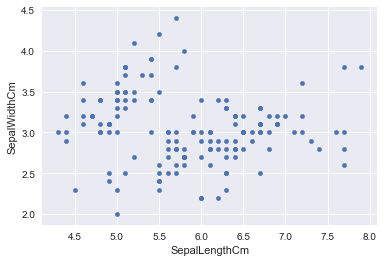

In [6]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

The Seaborn library also provides plotting methods. This jointplot from seaborn can show a bivariate scatterplot and univariate histogram in the same visualization.  

A bivariate scatterplot is a way of graphing two different types of variables that have been measured against the same sample of data.  Here the sepal length and sepal widths have both been measured against a species. 

A univariate histogram is a way of showing one variable of data in a visualization, using a histogram.  In this example, the number of times a particular sepal width or sepal length occurs is represented on the correlating axis via a histogram. 

In this example, we are plotting the sepal length on the x-axis and the sepal width on the y-axis.

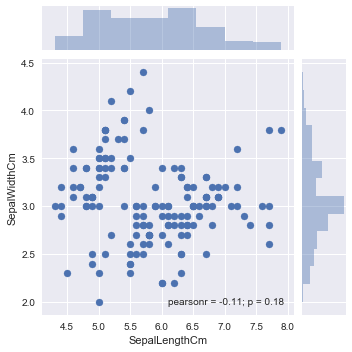

In [7]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

We can perform the same visualization using the petal length and width, to see if there is any similarity.

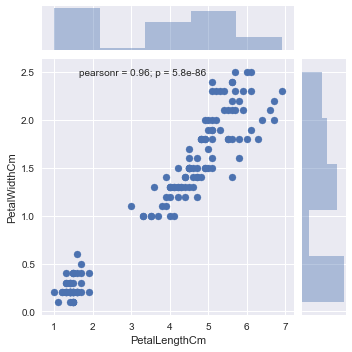

In [8]:
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris, size=5)

In both of these visualizations, the species is missing. All these visualizations is doing right now is comparing the length and widths, but not taking the species into account.  We can use a ```FacetGrid``` to build a multi-series scatterplot to see if the species are grouped somehow, or if the species does not matter at all.

By adding a legend, we can see which species is represented by which color dot.  Here, blue represents Iris-setosa, green is Iris-versicolor, and red is Iris-virginica.

Immediately, we can see that there is in fact a grouping.  Iris-setosa appears to be closely grouped, with a smaller sepal length, and larger sepal width.  

Iris-veriscolor and Iris-virginica appear to be more closely related than Iris-setosa, but Iris-versicolor typically has a smaller sepal length than Iris-virginica.

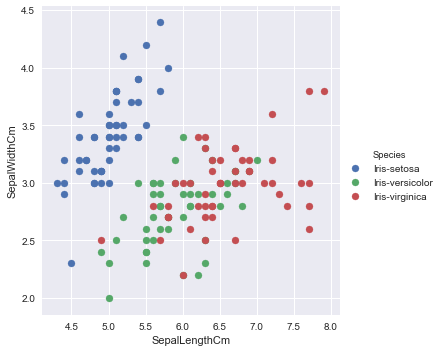

In [11]:
sns.FacetGrid(iris, hue="Species", size=5) \
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
.add_legend()

Now let's explore the petal length and width, using the same method. 

With petal lengths and widths, there's even more distinct groupings.  Iris-setosa, represented by blue dots again, have very small petal lengths and widths as compared to Iris-virginica (represented by red dots). 

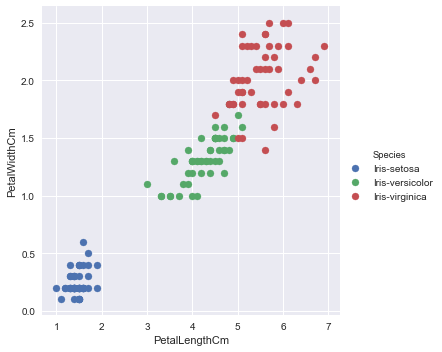

In [12]:
sns.FacetGrid(iris, hue="Species", size=5) \
.map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
.add_legend()

### Box Plots

A boxplot is a method of visualizing the distribution of data. It uses 5 points of data:

1. Minimum value
2. First quartile
3. Median
4. Third quartile
5. Maximum value

Using these 5 data points, we can easily see how closely grouped the data is, and if there are any wild variants to account for.  The smaller the box, which is comprised of the first quartile, median and third quartile, the more closely similar the data points are.

In the following example, we can plot the petal lengths, by species, to see how similar the petal lengths are.

We can see that Iris-setosa is very closely grouped, just as we saw in the previous visualization. We also saw a greater variance in data for Iris-versicolor and Iris-virginica, which is confirmed in our boxplot below.

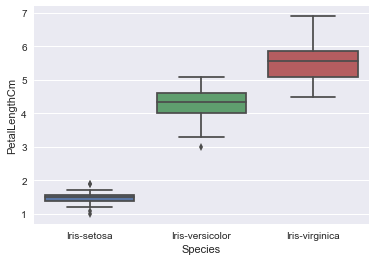

In [13]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

To examine this further, we can add in all the actual data points on top of the boxplot. This allows us to see just how many data points fall in the box and how many are outside.

Seaborn provides a ```stripplot()``` method precisely for this.  One key parameter to include is ```jitter="True"```. This makes all the plotted dots appear spread out rather than in one vertical line, which would make the visualization difficult to understand.

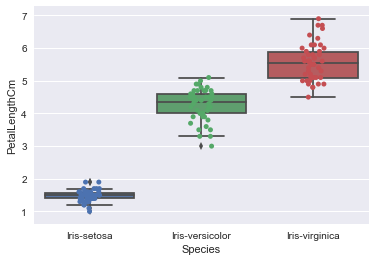

In [16]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True)

### Violin Plots

Seaborn also provides method of generating violin plots.  A violin plot is very similar to a box plot, but it also shows the density of the data at different values, similar to a histogram.  We previously demonstrated this with the univariate histogram that was added to the scatter plots above.

Violin plots provide a bit more data than a box plot alone.  Box plots tend to show only summary data, whereas the violin plot includes the full distribution of the data. 

The inner part of a violin plot typically shows the mean range of data.  The fatter the violin plot, the more dense the data points are, meaning the more likely they occur in the data set.

In the following example, we can see that Iris-setosa has a high chance of having a petal length of approximately 1.5cm, whereas the other species vary in length quite a bit more.

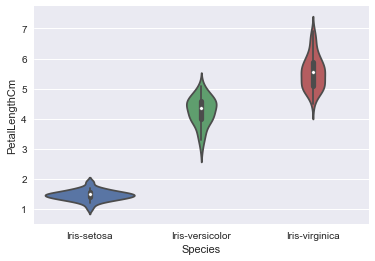

In [17]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

### Pair Plots

Sometimes a data set will have several sets of measured data and creating scatter plots comparing each one to another can be time consuming.  Seaborn provides a method that will visualize each set of data against all others, giving you a quick and dirty method of seeing all comparisons.

After seeing the pairplot, a deeper dive into the data can happen. In our example below, we can easily see that Iris-setosa is quite separate from the other two species in all combinations.  

Something to note is that the pairplot method will compare EVERY set of data against each other. In this data set, there is a column called ```Id``` which is only used as a unique identifier for each row of data. We need to eliminate this column from the data set because it is meaningless to compare to others.

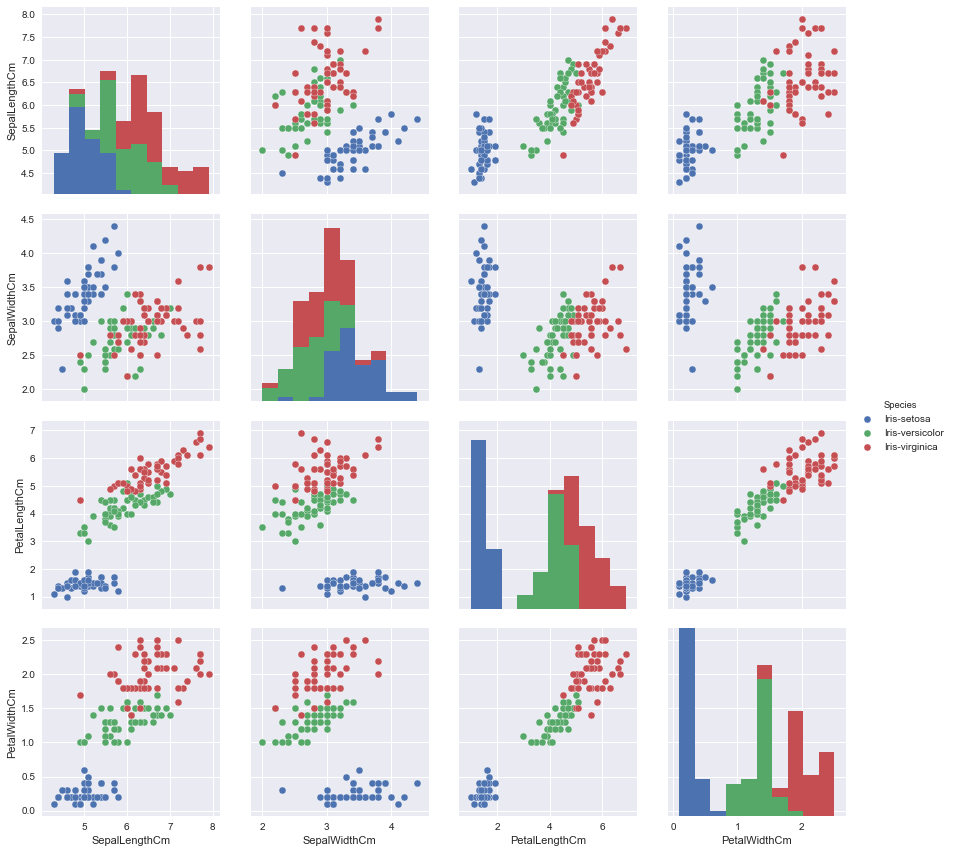

In [21]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

## Color Palettes

Seaborn has several ways of changing up the color palette of your visualizations. We have seen in our previous examples that blue, green, and red are the default colors for the 3 species we have in our data set. What if we had more than 3 species? What would the colors be.  Seaborn allows us to view the current color palette rather easily.

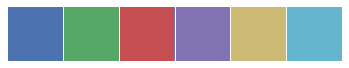

In [24]:
sns.palplot(sns.color_palette())

Seaborn has several built in palettes to use, and setting the default palette is quite easy.  Below is an example of one of our previous scatter plots with a different color palette applied.

The color palette is not permanently set, but rather only used for this particular visualization.  We can set the lightness with the ```l``` parameter, and the saturation with the ```s``` parameter. 

Now instead of the default blue, Iris-setosa is now a dark red colo.

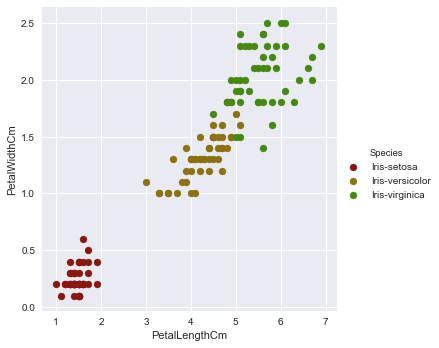

In [35]:
with sns.hls_palette(8, l=.3, s=.8):
    sns.FacetGrid(iris, hue="Species", size=5) \
    .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
    .add_legend()

Depending on the application, a color palette that is more sequential in nature might be desired. This is very similar to a paint chip sample found at hardware stores, showing the same color in different hues. This might not be the best option with a visualization because the differences in colors can be too close to each other and might confuse the user.

Here we use the same plot as above, but with a sequential palette of greens.

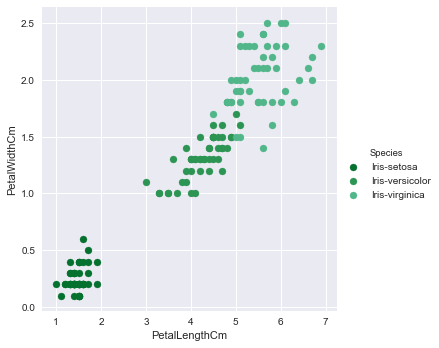

In [36]:
with sns.color_palette("BuGn_r"):
    sns.FacetGrid(iris, hue="Species", size=5) \
    .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
    .add_legend()